# Digital Signal Image Processing Assignment - Wavelets

**Riccardo Caprile 4370774**

Description of the assignment : Compute the Haar wavelet transform of two 32-pixel image $I_{32}$ and $J_{32}$ using the appropriate analysis filters.

Sample the 32 values forming $I_{32}$ uniformly from the set {0,1,...,255}.

Sample the first 16t values forming $J_{32}$ uniformly from the set {24,25,26,27} and the second 16 values from the set {201,202,203,204}.

In both cases compute the fraction of the detail coefficients larger than 1/100 and comment on the obtained results

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
import pywt

# Let's compute and plot $I_{32}$ and $J_{32}$

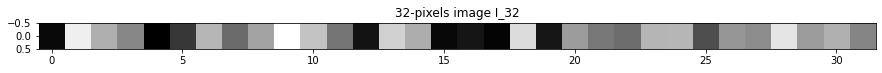

In [6]:
#32-pixels image I_32 sampled uniformly from the set {0,1,...,255}
 
I_32 = np.random.randint(0,256,32)

plt.imshow([I_32],cmap = "gray")
plt.title("32-pixels image I_32")

Text(0.5, 1.0, '32-pixels image J_32')

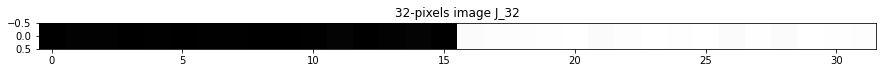

In [12]:
#32-pixels image J_32 , the first 16 values sampled from the set{24,25,26,27} and the second 16 values from the set {201,202,203,204}
 
J_32 = np.concatenate((np.random.randint(24,28,size = (16,)),np.random.randint(201,205,size = (16,))))

plt.imshow([J_32],cmap = "gray")
plt.title("32-pixels image J_32")

# Single Level Discrete Wavelet Transform

Let's do the single level decomposition for $I_{32}$

In [15]:
I_cA , I_cD = pywt.dwt(I_32,"haar") #Approximation and Detail coefficients

print("Coefficients with lower resolution are :" , I_cA)
print("Detail coefficients are:" , I_cD)

Coefficients with lower resolution are : [169.70562748 211.42492757  41.01219331 197.28279195 283.54981926
 213.54624792 156.27059864 125.15790027  21.21320344 166.17009358
 188.0904038  197.98989873 178.19090886 198.69700551 260.92240226
 210.71782079]
Detail coefficients are: [-152.73506474   26.1629509   -36.76955262   50.20458146  -61.51828996
   52.32590181 -126.57211383  109.60155108   11.3137085   132.22896808
   24.04163056  -48.08326112   69.29646456    6.36396103   48.7903679
   28.28427125]


and now Let's do the single level decomposition for $J_{32}$

In [16]:
J_cA , J_cD = pywt.dwt(J_32,"haar") #Approximation and Detail coefficients

print("Coefficients with lower resolution are :" , J_cA)
print("Detail coefficients are:" , J_cD)

Coefficients with lower resolution are : [ 35.35533906  35.35533906  34.64823228  35.35533906  33.9411255
  36.76955262  35.35533906  36.06244584 284.96403282 286.37824638
 286.37824638 287.08535316 287.79245994 285.6711396  286.37824638
 286.37824638]
Detail coefficients are: [-1.41421356  1.41421356  0.70710678  0.          0.         -1.41421356
 -1.41421356  2.12132034 -0.70710678 -0.70710678  2.12132034 -1.41421356
 -0.70710678 -1.41421356 -2.12132034  0.70710678]


# Let's Reconstruct the two images for verifying everything was correct

Comparing the two 32-pixels images we can see that everything was correct

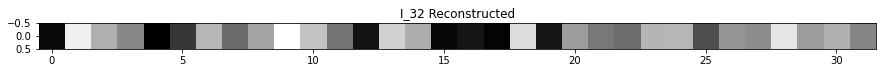

Text(0.5, 1.0, '32-pixels image I_32')

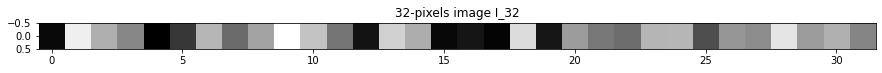

In [24]:
#Reconstruction of I_32

I_32_Reconstructed = pywt.idwt(I_cA,I_cD,"haar")

plt.imshow([I_32_Reconstructed],cmap = "gray")
plt.title("I_32 Reconstructed")
plt.show()
plt.imshow([I_32],cmap = "gray")
plt.title("32-pixels image I_32")

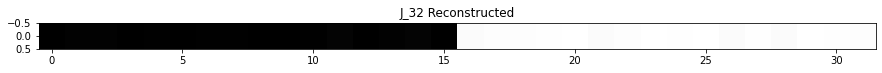

Text(0.5, 1.0, '32-pixels image J_32')

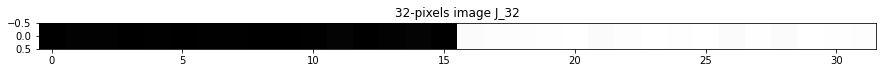

In [25]:
#Reconstruction of J_32

J_32_Reconstructed = pywt.idwt(J_cA,J_cD,"haar")

plt.imshow([J_32_Reconstructed],cmap = "gray")
plt.title("J_32 Reconstructed")
plt.show()
plt.imshow([J_32],cmap = "gray")
plt.title("32-pixels image J_32")

At lessons we have seen that the first coefficients is the average between the first and the second pixel of the image , the second coefficient is the average between the third and fourth pixel and so on. But the pywt library does something different. During the decomposition it multiply the average by a $1/\sqrt 2$ for making the Haar wavelets orthonormal. We can verify this easily

In [ ]:
av = (I_32[0] + I_32[1]) /2 #compute the average of the first two pixels

print("average = ",av, "and decomposition =",I_cA[0]/np.sqrt(2))

average =  120.0 and decomposition = 120.00000000000001


# Let's decompose $I_{32}$ and $J_{32}$ multiple times 

For decomposing an image multiple times pywt provides a function where you can decide how many times you want to decompose it

In [41]:
I_cA5 ,I_cD5 , I_cD4 , I_cD3 , I_cD2, I_cD1  = pywt.wavedec(I_32,"haar",level = 5)

In [45]:
print(I_cA5)
print(I_cD5, "Resolution =",I_cD5.size)
print(I_cD4, "Resolution =",I_cD4.size)
print(I_cD3, "Resolution =",I_cD3.size)
print(I_cD2, "Resolution =",I_cD2.size)
print(I_cD1, "Resolution =",I_cD1.size)

[704.98546084]
[-6.01040764] Resolution = 1
[-56.25 -97.25] Resolution = 2
[ 71.4177849  107.83378413 -99.34850276 -47.37615434] Resolution = 4
[ -29.5 -110.5   49.5   22.  -102.5   -7.   -14.5   35.5] Resolution = 8
[-152.73506474   26.1629509   -36.76955262   50.20458146  -61.51828996
   52.32590181 -126.57211383  109.60155108   11.3137085   132.22896808
   24.04163056  -48.08326112   69.29646456    6.36396103   48.7903679
   28.28427125] Resolution = 16


**Now we can compute the fraction of the details coefficients larger than 1/100** 

In [46]:
dc_I_32 = np.concatenate((I_cD5 , I_cD4 , I_cD3 , I_cD2, I_cD1))

In [47]:
filter_dc_I_32 = [i for i in np.abs(dc_I_32) if i > 1/100]

In [50]:
Fraction = len(filter_dc_I_32)/len(dc_I_32)
print(Fraction)

1.0


The last step , as we have done before , is to reconstruct the multilevel decomposed image

In [55]:
I_coeff = I_cA5 ,I_cD5 , I_cD4 , I_cD3 , I_cD2, I_cD1 

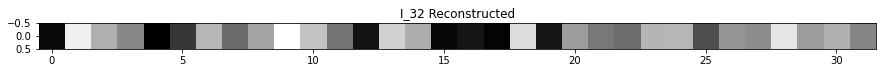

Text(0.5, 1.0, '32-pixels image I_32')

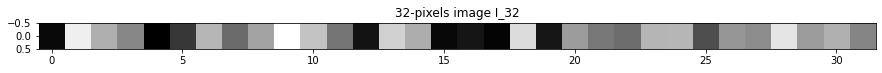

In [56]:
#Reconstruction of I_32

I_32_Reconstructed = pywt.waverec(I_coeff,"haar")

plt.imshow([I_32_Reconstructed],cmap = "gray")
plt.title("I_32 Reconstructed")
plt.show()
plt.imshow([I_32],cmap = "gray")
plt.title("32-pixels image I_32")

Now, we have to follow the same steps for $J_{32}$

In [58]:
J_cA5 ,J_cD5 , J_cD4 , J_cD3 , J_cD2, J_cD1  = pywt.wavedec(J_32,"haar",level = 5)

In [59]:
print(I_cA5)
print(I_cD5, "Resolution =",I_cD5.size)
print(I_cD4, "Resolution =",I_cD4.size)
print(I_cD3, "Resolution =",I_cD3.size)
print(I_cD2, "Resolution =",I_cD2.size)
print(I_cD1, "Resolution =",I_cD1.size)

[704.98546084]
[-6.01040764] Resolution = 1
[-56.25 -97.25] Resolution = 2
[ 71.4177849  107.83378413 -99.34850276 -47.37615434] Resolution = 4
[ -29.5 -110.5   49.5   22.  -102.5   -7.   -14.5   35.5] Resolution = 8
[-152.73506474   26.1629509   -36.76955262   50.20458146  -61.51828996
   52.32590181 -126.57211383  109.60155108   11.3137085   132.22896808
   24.04163056  -48.08326112   69.29646456    6.36396103   48.7903679
   28.28427125] Resolution = 16


In [60]:
dc_J_32 = np.concatenate((J_cD5 , J_cD4 , J_cD3 , J_cD2, J_cD1))

In [61]:
filter_dc_J_32 = [i for i in np.abs(dc_J_32) if i > 1/100]

In [66]:
Fraction = len(filter_dc_I_32)/len(dc_I_32)
print(Fraction)

1.0


In [68]:
J_coeff = J_cA5 ,J_cD5 , J_cD4 , J_cD3 , J_cD2, J_cD1 

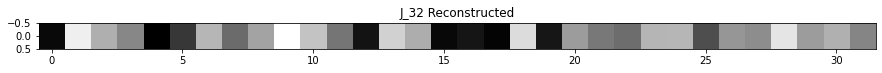

Text(0.5, 1.0, '32-pixels image J_32')

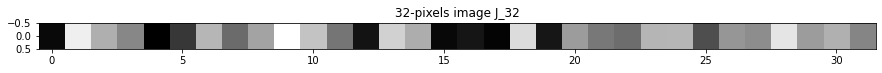

In [69]:
#Reconstruction of J_32

J_32_Reconstructed = pywt.waverec(J_coeff,"haar")

plt.imshow([I_32_Reconstructed],cmap = "gray")
plt.title("J_32 Reconstructed")
plt.show()
plt.imshow([I_32],cmap = "gray")
plt.title("32-pixels image J_32")